# Problem 3.7.5 Reduced Michaelis-Menten

In [15]:
using Plots, DifferentialEquations, Parameters, LabelledArrays, Setfield
Plots.gr(fmt=:png, lw=2)

Plots.GRBackend()

In [1]:
# Convenience functions
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)
reducedmm(x, k) = x / k

reducedmm (generic function with 1 method)

In [4]:
function model!(du, u, p, t)
	@unpack V0, VM1, VM2, VM3, KM1, KM2, KM3, _mm = p
	@unpack s1, s2, s3 = u
	v1 = VM1 * _mm(s1, KM1)
	v2 = VM2 * _mm(s2, KM2)
	v3 = VM3 * _mm(s3, KM3)
	du.s1 = V0 - v1
	du.s2 = v1 - v2
	du.s3 = v2 - v3
	return du
end

model! (generic function with 1 method)

In [5]:
u0 = LVector(s1=0.3, s2=0.2, s3=0.1)
tend = 2.0

2.0

In [6]:
params1 = (V0 = 2.0,
	VM1 = 9.0,
	VM2 = 12.0,
	VM3 = 15.0,
	KM1 = 1.0,
	KM2 = 0.4,
	KM3 = 3.0,
	_mm = hill)

(V0 = 2.0, VM1 = 9.0, VM2 = 12.0, VM3 = 15.0, KM1 = 1.0, KM2 = 0.4, KM3 = 3.0, _mm = hill)

In [10]:
sol1 = solve(ODEProblem(model!, u0, tend, params1));

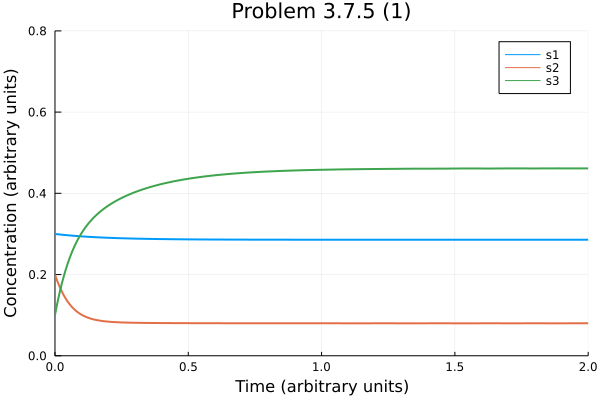

In [11]:
plot(sol1, ylims=(0.0, 0.8),
     title="Problem 3.7.5 (1)",
     xlabel="Time (arbitrary units)",
     ylabel="Concentration (arbitrary units)")

In [12]:
u02 = LVector(s1=6.0, s2=4.0, s3=4.0)
sol2 = solve(ODEProblem(model!, u02, 4.0, params1));

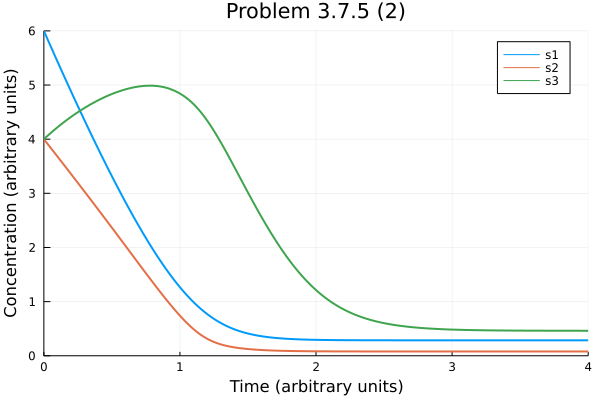

In [13]:
plot(sol2, ylims=(0.0, 6.0),
     title="Problem 3.7.5 (2)",
     xlabel="Time (arbitrary units)",
     ylabel="Concentration (arbitrary units)")

In [16]:
params2 = @set params1._mm = reducedmm

(V0 = 2.0, VM1 = 9.0, VM2 = 12.0, VM3 = 15.0, KM1 = 1.0, KM2 = 0.4, KM3 = 3.0, _mm = reducedmm)

In [17]:
sol3 = solve(ODEProblem(model!, u0, tend, params2));

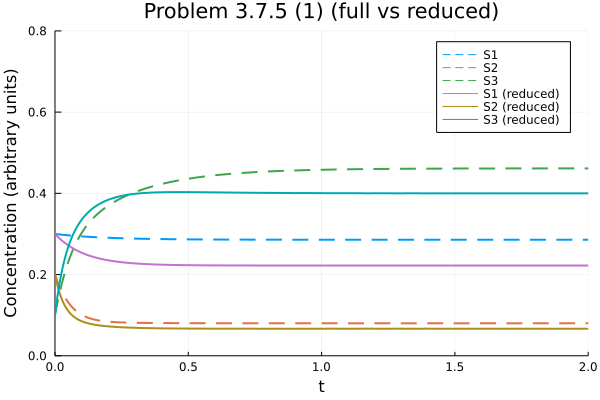

In [19]:
p3 = plot(sol1, ylims=(0.0, 0.8),
     title="Problem 3.7.5 (1) (full vs reduced)",
     xlabel="Time (arbitrary units)",
     ylabel="Concentration (arbitrary units)",
     labels=["S1 " "S2 " "S3 "], ls=:dash)
plot!(p3, sol3, labels=["S1 (reduced)" "S2 (reduced)" "S3 (reduced)"] )

In [20]:
sol4 = solve(ODEProblem(model!, u02, 4.0, params2));

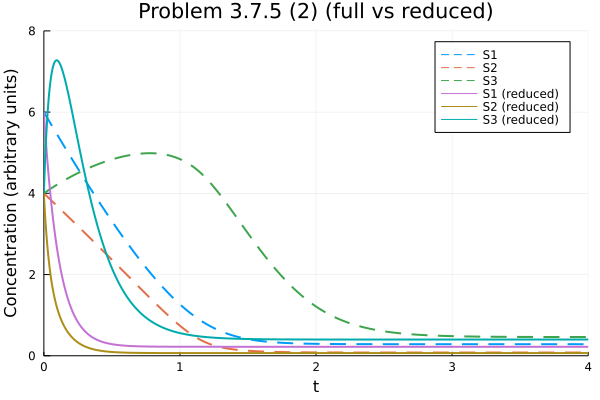

In [21]:
p4 = plot(sol2, ylims=(0.0, 8.0),
     title="Problem 3.7.5 (2) (full vs reduced)",
     xlabel="Time (arbitrary units)",
     ylabel="Concentration (arbitrary units)",
     labels=["S1 " "S2 " "S3 "], ls=:dash)
plot!(p4, sol4, labels=["S1 (reduced)" "S2 (reduced)" "S3 (reduced)"] )